The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


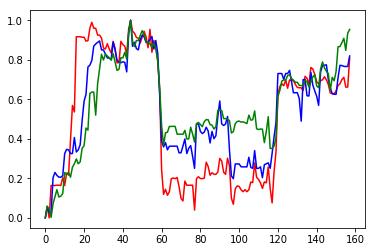

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.gdax_client import GdaxClient
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

gc = GdaxClient()
rates_btc = gc.get_product_historic_rates(product_id='BTC-EUR', granularity=300)
df_btc = pd.DataFrame(data=rates_btc)
rates_ether = gc.get_product_historic_rates(product_id='ETH-EUR', granularity=300)
df_ether = pd.DataFrame(data=rates_ether)
rates_ltc = gc.get_product_historic_rates(product_id='LTC-EUR', granularity=300)
df_ltc = pd.DataFrame(data=rates_ltc)
rates_bch = gc.get_product_historic_rates(product_id='BCH-EUR', granularity=300)
df_bch = pd.DataFrame(data=rates_bch)


sc = MinMaxScaler(feature_range=(0, 1))
bch = sc.fit_transform(df_bch[1].values.reshape(-1, 1))
ether = sc.fit_transform(df_ether[-df_bch[1].count():][1].values.reshape(-1, 1))
btc = sc.fit_transform(df_btc[-df_bch[1].count():][1].values.reshape(-1, 1))
ltc = sc.fit_transform(df_ltc[-df_bch[1].count():][1].values.reshape(-1, 1))

plt.plot(btc, 'r', )
plt.plot(ether, 'b')
plt.plot(ltc, 'g')
#plt.plot(bch, 'y')